In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("/content/Train_data.csv")
X = df.drop(['popularity','release_date','id','mode','explicit','key'], axis=1)
y = df.popularity
df.head()

FileNotFoundError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [ ]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.3008136  0.1440849  0.10319006 0.09358274 0.08397534 0.08094498
 0.07159155 0.05102229 0.03267072 0.0270205  0.01110331]


In [ ]:
def dimen(X_train, X_test, y_train, y_test, n):
  pca = PCA(n_components=n)
  X_trainx = pca.fit_transform(X_train)
  X_testx = pca.transform(X_test)

  from sklearn.ensemble import RandomForestClassifier
  classifier = RandomForestClassifier(n_estimators=200,criterion='entropy',max_depth=4,random_state=69)
  classifier.fit(X_trainx, y_train)
  # Predicting the Test set results
  y_pred = classifier.predict(X_testx)

  from sklearn.metrics import f1_score
  from sklearn.metrics import accuracy_score
  fom = f1_score(y_test, y_pred,average='weighted')
  acc = accuracy_score(y_test, y_pred)
  return fom,acc

In [ ]:
n_dim = [1,2,3,4,5,6,7,8,9,10,11]
for i in range(len(n_dim)):
  x = dimen(X_train, X_test, y_train, y_test, n_dim[i])
  print("no. of dimensions: ",n_dim[i]," ,Accuracy: ",x[1]," ,F1Score: ",x[0],".\n")

no. of dimensions:  1  ,Accuracy:  0.4129190515126738  ,F1Score:  0.39244888349444984 .

no. of dimensions:  2  ,Accuracy:  0.42927228127555195  ,F1Score:  0.4147458402101386 .

no. of dimensions:  3  ,Accuracy:  0.45298446443172524  ,F1Score:  0.43846860548596284 .

no. of dimensions:  4  ,Accuracy:  0.4627964022894522  ,F1Score:  0.4336164934957169 .

no. of dimensions:  5  ,Accuracy:  0.48528209321340965  ,F1Score:  0.46274953509283395 .

no. of dimensions:  6  ,Accuracy:  0.48814390842191335  ,F1Score:  0.4702246642691776 .

no. of dimensions:  7  ,Accuracy:  0.4922322158626329  ,F1Score:  0.46704173818740136 .

no. of dimensions:  8  ,Accuracy:  0.4946852003270646  ,F1Score:  0.4720423401460309 .

no. of dimensions:  9  ,Accuracy:  0.4922322158626329  ,F1Score:  0.461026821368085 .

no. of dimensions:  10  ,Accuracy:  0.5004088307440719  ,F1Score:  0.4688240731682385 .

no. of dimensions:  11  ,Accuracy:  0.5016353229762878  ,F1Score:  0.4699038403307533 .



In [ ]:
#interpretation using tsne
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
tsne_obj= tsne.fit_transform(X_train)

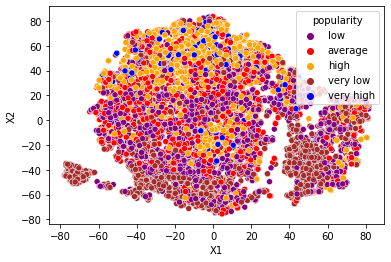

In [ ]:
tsne_df = pd.DataFrame({'X1':tsne_obj[:,0],
                        'X2':tsne_obj[:,1],
                        'popularity':y_train})
sns.scatterplot(x="X1", y="X2",
              hue="popularity",
              palette=['purple','red','orange','brown','blue'],
              legend='full',
              data=tsne_df);